In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [ ]:
ssim= np.load('SSIM.npy', allow_pickle=True).item()

In [3]:
df1= pd.DataFrame(index=np.arange(96))
df2=pd.DataFrame(index=np.arange(96))
df1.loc[:,'20041121']= [item[0] for item in ssim['2004'][0]]
df1.loc[np.arange(72),'20061015']= [item[0] for item in ssim['2006'][0]]
df1.loc[np.arange(72),'20080913']= [item[0] for item in ssim['2008'][0]]
df1.loc[np.arange(72),'20120712']= [item[0] for item in ssim['2012'][0]]
df1.loc[np.arange(48),'20130920']= [item[0] for item in ssim['2013'][0]]

df2.loc[:,'20041121']= [item[1] for item in ssim['2004'][0]]
df2.loc[np.arange(72),'20061015']= [item[1] for item in ssim['2006'][0]]
df2.loc[np.arange(72),'20080913']= [item[1] for item in ssim['2008'][0]]
df2.loc[np.arange(72),'20120712']= [item[1] for item in ssim['2012'][0]]
df2.loc[np.arange(48),'20130920']= [item[1] for item in ssim['2013'][0]]

In [55]:
df= pd.concat([pd.melt(df1,var_name='Event1',value_name='value1'), pd.melt(df2,var_name='Event2',value_name='value2')], axis=1)

In [52]:
df

,Event,value
0,20041121,0.213717
1,20041121,0.201600
2,20041121,0.207464
3,20041121,0.240809
4,20041121,0.317649
...,...,...
475,20130920,NaN
476,20130920,NaN
477,20130920,NaN
478,20130920,NaN


In [70]:
from matplotlib.patches import Patch

<Figure size 288x432 with 0 Axes>

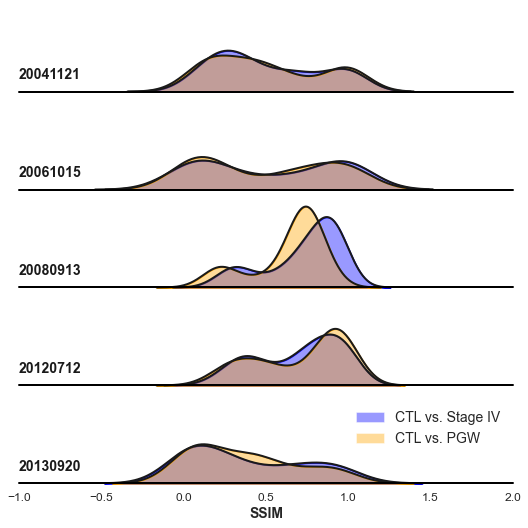

In [81]:
## Define globals
bandwidth = 0.35

fig= plt.figure(figsize=(4,6))

# Rearrange data for multiple KDE plots (this is the key!)
# df = pd.melt(df1,var_name='Event')

## Set up plotting and formatting of viz
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

## Hey this looks cool
#sns.kdeplot(df, bw=0.4)

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# Create axes for each Year, one row per Year
g = sns.FacetGrid(df, row="Event1", hue="Event1", aspect=5, height=1.5)

g.map(sns.kdeplot, "value1", clip_on=False,
      fill=True, alpha=0.4, linewidth=1.5, color='blue', label='CTL vs. Stage IV')
g.map(sns.kdeplot, "value1", clip_on=False,  lw=2, color='k')

g.map(sns.kdeplot, "value2", clip_on=False,
      fill=True, alpha=0.4, linewidth=1.5, color='orange', label='CTL vs. PGW')
g.map(sns.kdeplot, "value2", clip_on=False,  lw=2, color='k')


# Create the psuedo x-axes
g.map(plt.axhline, y=0, lw=2, clip_on=False, color='black')

# Define and use a simple function to label the plot in axes coordinates
# https://seaborn.pydata.org/examples/kde_joyplot.html
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color='k',
            ha="left", va="center", transform=ax.transAxes, fontsize=14)


g.map(label, "value1")

# Overlap the plots to give the ridgeline effect
g.fig.subplots_adjust(hspace=-.7)

# Clean up axes and remove subplot titles
g.set_titles('')
g.set_xlabels('SSIM', fontsize=14)
g.set(yticks=[])
# plt.xticks([0, 1, 2, 3], 
#            ['Constitutional Ban',
#             'Statutory Ban',
#             'No Law',
#             'Legal'],
#             rotation=90,
#             fontsize=12,
#             fontname='monospace')
# plt.xlabel('')
g.set_xticklabels(fontsize=12)
g.fig.subplots_adjust(hspace=-.25)
g.despine(bottom=True, left=True)

#add customized legend
legend_elements= [Patch(facecolor='blue', alpha=0.4,edgecolor='w',
                         label='CTL vs. Stage IV'),
                 Patch(facecolor='orange',alpha=0.4, edgecolor='w',
                         label='CTL vs. PGW'),] 
ax = plt.gca()
ax.legend(handles=legend_elements,frameon=False,fontsize=14);

# Add titles and annotations
# plt.text(1, 8.5,
#          'State Same Sex Marriage Laws in the USA',
#          fontdict=font_h1)
# plt.text(1, 8.3,
#          'Percent of states w/each law type from 1995-2015',
#          fontdict=font_h2)

In [82]:
g.savefig('src/SSIM.png', dpi=500)

<Figure size 288x432 with 0 Axes>

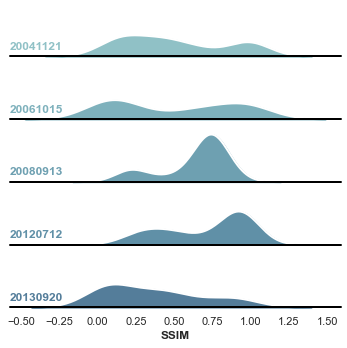

In [34]:
## Define globals
bandwidth = 0.35

fig= plt.figure(figsize=(4,6))

# Rearrange data for multiple KDE plots (this is the key!)
df = pd.melt(df2,var_name='Event')

## Set up plotting and formatting of viz
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

## Hey this looks cool
#sns.kdeplot(df, bw=0.4)

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# Create axes for each Year, one row per Year
g = sns.FacetGrid(df, row="Event", hue="Event", aspect=5, height=1, palette=pal)

g.map(sns.kdeplot, "value", clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2)

# Create the psuedo x-axes
g.map(plt.axhline, y=0, lw=2, clip_on=False, color='black')

# Define and use a simple function to label the plot in axes coordinates
# https://seaborn.pydata.org/examples/kde_joyplot.html
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "value")

# Overlap the plots to give the ridgeline effect
g.fig.subplots_adjust(hspace=-.7)

# Clean up axes and remove subplot titles
g.set_titles('')
g.set_xlabels('SSIM')
g.set(yticks=[])
# plt.xticks([0, 1, 2, 3], 
#            ['Constitutional Ban',
#             'Statutory Ban',
#             'No Law',
#             'Legal'],
#             rotation=90,
#             fontsize=12,
#             fontname='monospace')
# plt.xlabel('')
g.fig.subplots_adjust(hspace=-.25)
g.despine(bottom=True, left=True);

# Add titles and annotations
# plt.text(1, 8.5,
#          'State Same Sex Marriage Laws in the USA',
#          fontdict=font_h1)
# plt.text(1, 8.3,
#          'Percent of states w/each law type from 1995-2015',
#          fontdict=font_h2)

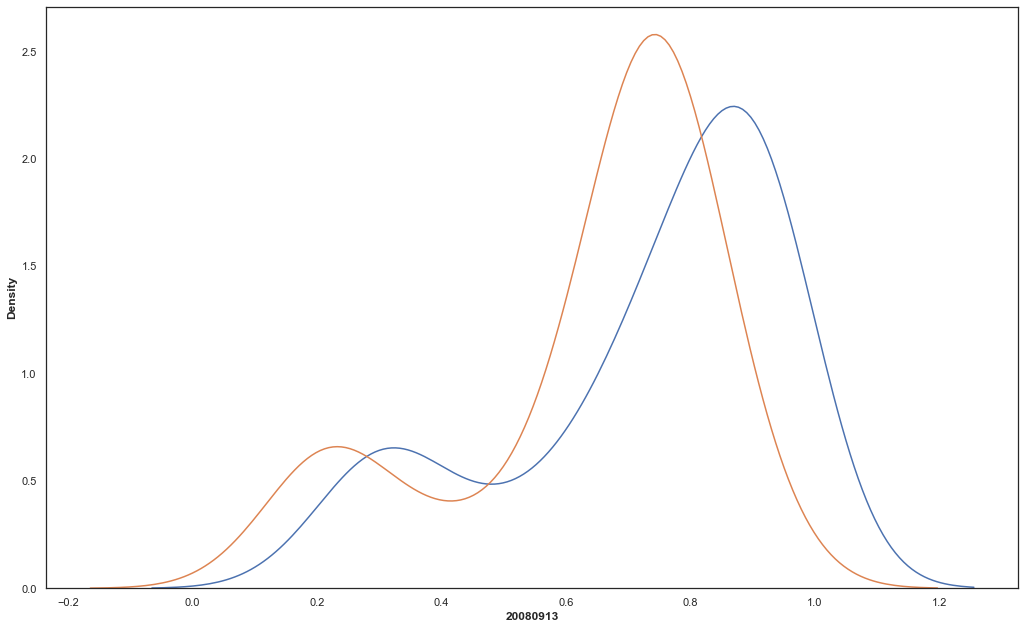

In [43]:
sns.kdeplot(df1.iloc[:,2])
sns.kdeplot(df2.iloc[:,2])